<a href="https://colab.research.google.com/github/sarthakkaushik/Cdiscount-Image-Classification/blob/main/Experiment_Cdiscount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code to mount google drive in case you are loading the data from your google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
# Are we using a GPU? (if not & you're using Google Colab, go to Runtime -> Change Runtime Type -> Harware Accelerator: GPU )
!nvidia-smi

Tue Feb  8 06:28:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip3 install scikit-image
!pip3 install wandb

     |████████████████████████████████| 1.7 MB 14.0 MB/s 
     |████████████████████████████████| 143 kB 69.3 MB/s 
     |████████████████████████████████| 180 kB 72.7 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=acbac8ae506b22c6be769bb5f9a283f79b1041e3362510755602363d1aaf773b
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [4]:
!apt-get install progress

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [8]:
import os 
data_path = '/gdrive/MyDrive/UOH Assignment Dataset/cdiscount'
os.chdir(data_path)
print(os.getcwd())

/gdrive/MyDrive/UOH Assignment Dataset/cdiscount


In [9]:
!cp -r train.bson /content/ & progress -mp $! # Cp command copy file from source to destination 

)07No PID(s) currently monitored
No PID(s) currently monitored
[  606] cp /gdrive/MyDrive/UOH Assignment Dataset/cdiscount/train.bson0.0% (4 MiB / 58.2 GiB) 4.0 MiB/s remaining 4:08:26

[  606] cp /gdrive/MyDrive/UOH Assignment Dataset/cdiscount/train.bson0.1% (55.9 MiB / 58.2 GiB) 27.9 MiB/s remaining 0:35:32

[  606] cp /gdrive/MyDrive/UOH Assignment Dataset/cdiscount/train.bson0.2% (111.9 MiB / 58.2 GiB) 37.3 MiB/s remaining 0:26:35

[  606] cp /gdrive/MyDrive/UOH Assignment Dataset/cdiscount/train.bson0.3% (189 MiB / 58.2 GiB) 47.2 MiB/s remaining 0:20:57

[  606] cp /gdrive/MyDrive/UOH Assignment Dataset/cdiscount/train.bson0.5% (287.9 MiB / 58.2 GiB) 57.5 MiB/s remaining 0:17:10

[  606] cp /gdrive/MyDrive/UOH Assignment Dataset/cdiscount/train.bson0.6% (383.9 MiB / 58.2 GiB) 63.9 MiB/s remaining 0:15:25

[  606] cp /gdrive/MyDrive/UOH Assignment Dataset/cdiscount/train.bson0.7% (431.4 MiB / 58.2 GiB) 61.6 MiB/s remaining 0:16:00

[  606] cp /gdrive/MyDrive/UOH Assignment Datas

In [10]:
os.chdir("/content/")
print(os.getcwd())
# !mkdir  - p dataset
! ls

/content
sample_data  train.bson


In [ ]:
!du -sh train.bson

59G	train.bson


In [11]:
import os, sys, math, io
import numpy as np
import pandas as pd
import multiprocessing as mp
import bson
import struct
import random

%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

from collections import defaultdict
from tqdm import *

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../cdiscount"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

In [12]:
os.chdir("/content/")
# print(os.getcwd())
data_dir = "./"


train_bson_path = os.path.join(data_dir, "train.bson")
num_train_products = 7069896

# train_bson_path = os.path.join(data_dir, "train_example.bson")
# num_train_products = 82
data_path = '/gdrive/MyDrive/UOH Assignment Dataset/cdiscount'
os.chdir(data_path)
data_dir = "../cdiscount/"


test_bson_path = os.path.join(data_dir, "test.bson")
num_test_products = 1768182

# *Create lookup tables*

In [13]:
#The generator uses several lookup tables that describe the layout of the BSON file, which products and images are part of the training/validation sets, and so on.

#You only need to generate these tables once, as they get saved to CSV files.

#Lookup table for categories
categories_path = os.path.join(data_dir, "category_names.csv")
categories_df = pd.read_csv(categories_path, index_col="category_id")

# Maps the category_id to an integer index. This is what we'll use to
# one-hot encode the labels.
categories_df["category_idx"] = pd.Series(range(len(categories_df)), index=categories_df.index)

# categories_df.to_csv("categories.csv")
categories_df.head()

,category_level1,category_level2,category_level3,category_idx
category_id,,,,
1000021794,ABONNEMENT / SERVICES,CARTE PREPAYEE,CARTE PREPAYEE MULTIMEDIA,0
1000012764,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI FUMEUR,1
1000012776,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI VELO - ABRI MOTO,2
1000012768,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,FONTAINE A EAU,3
1000012755,AMENAGEMENT URBAIN - VOIRIE,SIGNALETIQUE,PANNEAU D'INFORMATION EXTERIEUR,4


In [14]:
#Create dictionaries for quick lookup of category_id to category_idx mapping.
def make_category_tables():
    cat2idx = {}
    idx2cat = {}
    i=0
    for ir in categories_df.itertuples():
            
        category_id = ir[0]
        category_idx = ir[4]
        cat2idx[category_id] = category_idx
        idx2cat[category_idx] = category_id
      
    return cat2idx, idx2cat

In [15]:
cat2idx, idx2cat = make_category_tables()


##One time File *Creation*

In [ ]:
#this takes a few minutes to execute, but we only have to do it once (we'll save the table to a CSV file afterwards).
def read_bson(bson_path, num_records, with_categories):
    rows = {}
    with open(bson_path, "rb") as f, tqdm(total=num_records) as pbar:
        offset = 0
        while True:
            item_length_bytes = f.read(4)
            if len(item_length_bytes) == 0:
                break

            length = struct.unpack("<i", item_length_bytes)[0]

            f.seek(offset)
            item_data = f.read(length)
            assert len(item_data) == length

            item = bson.BSON.decode(item_data)
            product_id = item["_id"]
            num_imgs = len(item["imgs"])

            row = [num_imgs, offset, length]
            if with_categories:
                row += [item["category_id"]]
            rows[product_id] = row

            offset += length
            f.seek(offset)
            pbar.update()

    columns = ["num_imgs", "offset", "length"]
    if with_categories:
        columns += ["category_id"]

    df = pd.DataFrame.from_dict(rows, orient="index")
    df.index.name = "product_id"
    df.columns = columns
    df.sort_index(inplace=True)
    return df

In [ ]:
%time train_offsets_df = read_bson(train_bson_path, num_records=num_train_products, with_categories=True)

In [ ]:
train_offsets_df.columns

In [ ]:
train_offsets_df.head()

In [ ]:
train_offsets_df['category_id'].value_counts()

In [ ]:
train_offsets_df['num_imgs'].value_counts()

In [ ]:
train_offsets_df.to_csv("train_offsets.csv")

##Create a random train/validation split
We split on products, not on individual images. Since some of the categories only have a few products, we do the split separately for each category.

This creates two new tables, one for the training images and one for the validation images. There is a row for every single image, so if a product has more than one image it occurs more than once in the table.

In [ ]:
def make_val_set(df, split_percentage=0.2, drop_percentage=0.):
    # Find the product_ids for each category.
    category_dict = defaultdict(list)
    for ir in tqdm(df.itertuples()):
        category_dict[ir[4]].append(ir[0])

    train_list = []
    val_list = []
    with tqdm(total=len(df)) as pbar:
        for category_id, product_ids in category_dict.items():
            category_idx = cat2idx[category_id]

            # Randomly remove products to make the dataset smaller.
            keep_size = int(len(product_ids) * (1. - drop_percentage))
            if keep_size < len(product_ids):
                product_ids = np.random.choice(product_ids, keep_size, replace=False)

            # Randomly choose the products that become part of the validation set.
            val_size = int(len(product_ids) * split_percentage)
            if val_size > 0:
                val_ids = np.random.choice(product_ids, val_size, replace=False)
            else:
                val_ids = []

            # Create a new row for each image.
            for product_id in product_ids:
                row = [product_id, category_idx]
                for img_idx in range(df.loc[product_id, "num_imgs"]):
                    if product_id in val_ids:
                        val_list.append(row + [img_idx])
                    else:
                        train_list.append(row + [img_idx])
                pbar.update()
                
    columns = ["product_id", "category_idx", "img_idx"]
    train_df = pd.DataFrame(train_list, columns=columns)
    val_df = pd.DataFrame(val_list, columns=columns)   
    return train_df, val_df

In [ ]:
train_images_df, val_images_df = make_val_set(train_offsets_df, split_percentage=0.2, 
                                              drop_percentage=0.5)

NameError: ignored

In [ ]:
train_images_df.head()

In [ ]:
val_images_df.head()

In [ ]:
print("Number of training images:", len(train_images_df))
print("Number of validation images:", len(val_images_df))
print("Total images:", len(train_images_df) + len(val_images_df))

In [ ]:
len(train_images_df["category_idx"].unique()), len(val_images_df["category_idx"].unique())

In [ ]:
train_images_df.to_csv("train_images.csv")
val_images_df.to_csv("val_images.csv")

##Part 2: The generator

In [16]:
#First load the lookup tables from the CSV files (you don't need to do this if you just did all the steps from part 1).

categories_df = pd.read_csv("categories.csv", index_col=0)
cat2idx, idx2cat = make_category_tables()

train_offsets_df = pd.read_csv("train_offsets.csv", index_col=0)
train_images_df = pd.read_csv("train_images.csv", index_col=0)
val_images_df = pd.read_csv("val_images.csv", index_col=0)


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [17]:
from keras.preprocessing.image import Iterator
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from PIL import Image

class BSONIterator(Iterator):
    def __init__(self, bson_file, images_df, offsets_df, num_class,
                 image_data_generator, lock, target_size=(180, 180), 
                 with_labels=True, batch_size=32, shuffle=False, seed=None):

        self.file = bson_file
        self.images_df = images_df
        self.offsets_df = offsets_df
        self.with_labels = with_labels
        self.samples = len(images_df)
        self.num_class = num_class
        self.image_data_generator = image_data_generator
        self.target_size = tuple(target_size)
        self.image_shape = self.target_size + (3,)

        print("Found %d images belonging to %d classes." % (self.samples, self.num_class))

        super(BSONIterator, self).__init__(self.samples, batch_size, shuffle, seed)
        self.lock = lock

    def _get_batches_of_transformed_samples(self, index_array):
        batch_x = np.zeros((len(index_array),) + self.image_shape, dtype=K.floatx())
        if self.with_labels:
            batch_y = np.zeros((len(batch_x), self.num_class), dtype=K.floatx())

        for i, j in enumerate(index_array):
            # Protect file and dataframe access with a lock.
            with self.lock:
                image_row = self.images_df.iloc[j]
                product_id = image_row["product_id"]
                offset_row = self.offsets_df.loc[product_id]

                # Read this product's data from the BSON file.
                self.file.seek(offset_row["offset"])
                item_data = self.file.read(offset_row["length"])

            # Grab the image from the product.
            item = bson.BSON.decode(item_data)
            img_idx = image_row["img_idx"]
            bson_img = item["imgs"][img_idx]["picture"]

            # Load the image.
            #img = load_img(io.BytesIO(bson_img), target_size=self.target_size)
            #print(type(bson_img))
            #img  = load_img(bson_img, target_size =self.target_size)
            # Converting Keras Preprocessing Image load to Pillow Based loading
            # After loading convert to RGB optional as PIL loads in default RGGB
            # And resize is a necessary operation - to self.target_size
            
            img = Image.open(io.BytesIO(bson_img))
            img = img.convert('RGB')
            img = img.resize(self.target_size, Image.NEAREST)
            # Preprocess the image.
            x = img_to_array(img)
            x = self.image_data_generator.random_transform(x)
            x = self.image_data_generator.standardize(x)

            # Add the image and the label to the batch (one-hot encoded).
            batch_x[i] = x
            if self.with_labels:
                batch_y[i, image_row["category_idx"]] = 1

        if self.with_labels:
            return batch_x, batch_y
        else:
            return batch_x

    def next(self):
        with self.lock:
            index_array = next(self.index_generator)
        return self._get_batches_of_transformed_samples(index_array)

#Create a generator for training and a generator for validation.

In [18]:
os.chdir("/content/")
train_bson_file = open(train_bson_path, "rb")

In [19]:
#Because the training and validation generators read from the same BSON file, they need to use the same lock to protect it.
import threading
lock = threading.Lock()

In [20]:
num_classes = 5270
num_train_images = len(train_images_df)
num_val_images = len(val_images_df)
batch_size = 256

# Tip: use ImageDataGenerator for data augmentation and preprocessing.
train_datagen = ImageDataGenerator()
train_gen = BSONIterator(train_bson_file, train_images_df, train_offsets_df, 
                         num_classes, train_datagen, lock,
                         batch_size=batch_size, shuffle=True)

val_datagen = ImageDataGenerator()
val_gen = BSONIterator(train_bson_file, val_images_df, train_offsets_df,
                       num_classes, val_datagen, lock,
                       batch_size=batch_size, shuffle=True)

Found 4947723 images belonging to 5270 classes.
Found 1232064 images belonging to 5270 classes.


In [ ]:
next(train_gen)  # warm-up

%time bx, by = next(train_gen)

CPU times: user 342 ms, sys: 17.5 ms, total: 360 ms
Wall time: 769 ms


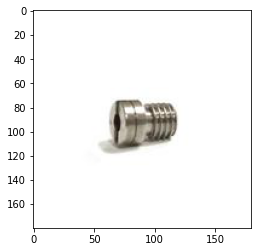

In [ ]:
plt.imshow(bx[-1].astype(np.uint8))

category_level1    AUTO - MOTO
category_level2         PIECES
category_level3    CARBURATEUR
category_idx               706
Name: 1000005796, dtype: object
category_level1    BIJOUX -  LUNETTES - MONTRES
category_level2                          BIJOUX
category_level3            BRACELET - GOURMETTE
category_idx                               1046
Name: 1000010110, dtype: object


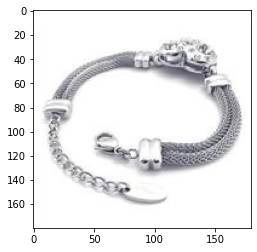

In [ ]:
cat_idx = np.argmax(by[-1])
cat_id = idx2cat[cat_idx]
print(categories_df.loc[cat_id])

bx, by = next(val_gen)

plt.imshow(bx[-1].astype(np.uint8))

cat_idx = np.argmax(by[-1])
cat_id = idx2cat[cat_idx]
print(categories_df.loc[cat_id])

#Modeling

In [79]:
!pip3 install wandb

In [80]:
# Wandb Loggers
import wandb
from wandb.keras import WandbCallback
wandb.init(project="cdiscount-diploma-project", entity="SarthakKaushik")

In [81]:
#Importing packages
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization,Dense, GlobalAveragePooling2D
from tensorflow.keras.layers.experimental import preprocessing

In [24]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision 

mixed_precision.global_policy() # should output "mixed_float16"

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-16GB, compute capability 7.0


<Policy "mixed_float16">

In [25]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [26]:
#Define callbacks

import datetime


dir_name = '/gdrive/MyDrive/UOH Assignment Dataset/cdiscount/Tensorboard'


#Tensorboard Callback
def create_tensorboard_callback(experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Setup checkpoint path
checkpoint_path = '/gdrive/MyDrive/UOH Assignment Dataset/cdiscount/CheckPoints/EfficientNetB7-50_percent_data/checkpoint.ckpt' # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch",# save every epoch
                                                         monitor="val_loss", 
                                                         verbose=1)


# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=4) # if val loss decreases for 3 epochs in a row, stop training



# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)


# #Step Decay

# def lr_step_decay(epoch, lr):
#     drop_rate = 0.5
#     epochs_drop = 10.0
#     return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))


# class StepDecay(tf.keras.optimizers.schedules.LearningRateSchedule):

#   def __init__(self, initAlpha=0.01, factor=0.25, dropEvery=2):
#       # store the base initial learning rate, drop factor, and
#       # epochs to drop every
#       self.initAlpha = initAlpha
#       self.factor = factor
#       self.dropEvery = dropEvery
#   def __call__(self, epoch):
#       # compute the learning rate for the current epoch
#       exp = np.floor((1 + epoch) / self.dropEvery)
#       alpha = self.initAlpha * (self.factor ** exp)
#       # return the learning rate
#       return float(alpha)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)






#EfficientB7 model

In [27]:
tf.keras.backend.clear_session()

###------------------------Base Model----------------------------------###

base_model_EfficientNetB7=tf.keras.applications.EfficientNetB7(include_top=False,weights="imagenet",input_shape=None,)
base_model_EfficientNetB7.trainable =False

#Setup Model architecture

inputs= layers.Input(shape=(180,180,3), name="input_layers",dtype=tf.float16) # updating dtype to float16 to handle mixed precesion
# x = preprocessing.Rescaling(1./255)(inputs) # Resent do not scale the image hence need to do manually
x=base_model_EfficientNetB7(inputs,training=False)
x=layers.GlobalAveragePooling2D(name="GlobalAveragePooling2D_layers")(x)
x=layers.Dropout(0.2)(x)
outputs=layers.Dense(num_classes, activation="softmax", dtype=tf.float32,name="output_layers_float_32")(x) # Converting back to float 32 from our mixed precesion

efficientB7_model=tf.keras.Model(inputs,outputs)


#Getting the summary of the model we created
efficientB7_model.summary()


258088960/258076736 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (InputLayer)   [(None, 180, 180, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 GlobalAveragePooling2D_laye  (None, 2560)             0         
 rs (GlobalAveragePooling2D)                                     
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 output_layers_float_32 (Den  (None, 5270)             13496470  
 se)                                                             
                                                            

In [64]:
epochs = 8
base_learning_rate = 1e-2


wandb.config = {
 "learning_rate" : base_learning_rate,
 "epochs" : epochs,
 "batch_size" : 256
}



# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate)
class LRLogger(tf.keras.callbacks.Callback):
    def __init__(self, optimizer):
        super(LRLogger, self).__init__
        self.optimizer =optimizer
    
    def on_epoch_end(self,epoch,logs):
        lr = self.optimizer.learning_rate(epoch)
        wandb.log({"lr":lr}, commit = False)


earlystopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="max",
    baseline=None,
    restore_best_weights=False,
)

# Setup checkpoint path
checkpoint_path = '/gdrive/MyDrive/UOH Assignment Dataset/cdiscount/CheckPoints/NEW_EfficientNetB7-50_percent_data/checkpoint.ckpt' # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch",# save every epoch
                                                         monitor="val_accuracy", 
                                                         verbose=1)


callbacks = [ checkpoint_callback,WandbCallback()]

In [65]:
efficientB7_model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy", 
    metrics=["accuracy", precision_m, recall_m, f1_m])

In [ ]:
Hist_1= efficientB7_model.fit(
    train_gen, epochs=epochs, callbacks=callbacks, validation_data=val_gen,
)

Epoch 1/8
19328/19328 [==============================] - ETA: 0s - loss: 7.7692 - accuracy: 0.3758 - precision_m: 0.4375 - recall_m: 0.3593 - f1_m: 0.3935
Epoch 00001: saving model to /gdrive/MyDrive/UOH Assignment Dataset/cdiscount/CheckPoints/NEW_EfficientNetB7-50_percent_data/checkpoint.ckpt


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19328/19328 [==============================] - 14297s 738ms/step - loss: 7.7692 - accuracy: 0.3758 - precision_m: 0.4375 - recall_m: 0.3593 - f1_m: 0.3935 - val_loss: 7.5391 - val_accuracy: 0.4324 - val_precision_m: 0.4878 - val_recall_m: 0.4190 - val_f1_m: 0.4507
Epoch 2/8
19328/19328 [==============================] - ETA: 0s - loss: 8.2289 - accuracy: 0.4012 - precision_m: 0.4439 - recall_m: 0.3898 - f1_m: 0.4150
Epoch 00002: saving model to /gdrive/MyDrive/UOH Assignment Dataset/cdiscount/CheckPoints/NEW_EfficientNetB7-50_percent_data/checkpoint.ckpt
19328/19328 [==============================] - 14458s 748ms/step - loss: 8.2289 - accuracy: 0.4012 - precision_m: 0.4439 - recall_m: 0.3898 - f1_m: 0.4150 - val_loss: 7.9748 - val_accuracy: 0.4428 - val_precision_m: 0.4924 - val_recall_m: 0.4307 - val_f1_m: 0.4594
Epoch 3/8
19328/19328 [==============================] - ETA: 0s - loss: 8.3658 - accuracy: 0.4083 - precision_m: 0.4477 - recall_m: 0.3977 - f1_m: 0.4212
Epoch 00003: saving

Loading saved model weights.

In [30]:
# Load in saved model weights and evaluate model
efficientB7_model.load_weights(checkpoint_path)
loaded_weights_model_results = efficientB7_model.evaluate(val_gen)

4813/4813 [==============================] - 2728s 563ms/step - loss: 8.6905 - accuracy: 0.4545 - precision_m: 0.5021 - recall_m: 0.4433 - f1_m: 0.4708


In [ ]:
# # Import helper functions we're going to use
# from helper import plot_loss_curves, unzip_data, walk_through_dir
# # Plot model loss curves
# # plot_loss_curves(efficientB7_model)

In [42]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [44]:
plot_loss_curves(loaded_weights_model_results)

AttributeError: ignored

#FineTuning Last 5 Layers

In [48]:
# Layers in loaded model
efficientB7_model.layers

In [49]:
for layer in efficientB7_model.layers:
  print(layer.trainable)

True
False
True
True
True


In [50]:
efficientB7_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (InputLayer)   [(None, 180, 180, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 GlobalAveragePooling2D_laye  (None, 2560)             0         
 rs (GlobalAveragePooling2D)                                     
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 output_layers_float_32 (Den  (None, 5270)             13496470  
 se)                                                             
                                                                 
Total params: 77,594,157
Trainable params: 13,496,470
Non-tra

In [51]:
print(len(efficientB7_model.layers[1].trainable_variables))

0


In [52]:
# How many layers are trainable in our base model?
print(len(efficientB7_model.layers[2].trainable_variables)) # layer at index 2 is the EfficientNetB7 layer (the base model)
print(len(base_model_EfficientNetB7.trainable_variables))

0
0


In [53]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model_EfficientNetB7.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block1b_dwconv False
18 block1b_bn False
19 block1b_activation False
20 block1b_se_squeeze False
21 block1b_se_reshape False
22 block1b_se_reduce False
23 block1b_se_expand False
24 block1b_se_excite False
25 block1b_project_conv False
26 block1b_project_bn False
27 block1b_drop False
28 block1b_add False
29 block1c_dwconv False
30 block1c_bn False
31 block1c_activation False
32 block1c_se_squeeze False
33 block1c_se_reshape False
34 block1c_se_reduce False
35 block1c_se_expand False
36 block1c_se_excite False
37 block1c_project_conv False
38 block1c_project_bn False
39 block1c_drop False
4

In [54]:
base_model_EfficientNetB7.trainable = True

# Freeze all layers except for the last 5
for layer in base_model_EfficientNetB7.layers[:-5]:
  layer.trainable = False



In [55]:
efficientB7_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (InputLayer)   [(None, 180, 180, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 GlobalAveragePooling2D_laye  (None, 2560)             0         
 rs (GlobalAveragePooling2D)                                     
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 output_layers_float_32 (Den  (None, 5270)             13496470  
 se)                                                             
                                                                 
Total params: 77,594,157
Trainable params: 15,139,990
Non-tra

In [82]:
epochs = 8
base_learning_rate = 1e-2


wandb.config = {
 "learning_rate" : base_learning_rate,
 "epochs" : epochs,
 "batch_size" : 256
}



# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate)
class LRLogger(tf.keras.callbacks.Callback):
    def __init__(self, optimizer):
        super(LRLogger, self).__init__
        self.optimizer =optimizer
    
    def on_epoch_end(self,epoch,logs):
        lr = self.optimizer.learning_rate(epoch)
        wandb.log({"lr":lr}, commit = False)


earlystopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="max",
    baseline=None,
    restore_best_weights=False,
)

# Setup checkpoint path
checkpoint_path = '/gdrive/MyDrive/UOH Assignment Dataset/cdiscount/CheckPoints/NEW_EfficientNetB7-50_percent_data_Fine_Tune/checkpoint.ckpt' # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch",# save every epoch
                                                         monitor="val_accuracy", 
                                                         verbose=1)


callbacks = [ checkpoint_callback,WandbCallback()]

In [83]:
efficientB7_model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy", 
    metrics=["accuracy", precision_m, recall_m, f1_m])

In [ ]:
# Fine tune for another 5 epochs
initial_epochs=0
fine_tune_epochs = 5

# Refit the model (same as 'model' except with more trainable layers)
# history_fine_10_model_3 = efficientB7_model.fit(train_gen,
#                                                epochs=fine_tune_epochs,
#                                                validation_data=val_gen,
#                                                initial_epoch=5, # start from previous last epoch
                                               
#                                                callbacks=[checkpoint_callback,create_tensorboard_callback("TranferLearning_EfficientNetB7_FineTune_10")], # name experim
                                              

Hist_1_Fine_Tune= efficientB7_model.fit(
    train_gen, epochs=5, callbacks=callbacks, validation_data=val_gen,
)

Epoch 1/5
19328/19328 [==============================] - ETA: 0s - loss: 3.3113 - accuracy: 0.4276 - precision_m: 0.7917 - recall_m: 0.3011 - f1_m: 0.4346
Epoch 00001: saving model to /gdrive/MyDrive/UOH Assignment Dataset/cdiscount/CheckPoints/NEW_EfficientNetB7-50_percent_data_Fine_Tune/checkpoint.ckpt


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19328/19328 [==============================] - 14346s 741ms/step - loss: 3.3113 - accuracy: 0.4276 - precision_m: 0.7917 - recall_m: 0.3011 - f1_m: 0.4346 - val_loss: 2.7028 - val_accuracy: 0.4917 - val_precision_m: 0.8311 - val_recall_m: 0.3637 - val_f1_m: 0.5055
Epoch 2/5
19328/19328 [==============================] - ETA: 0s - loss: 2.6557 - accuracy: 0.4935 - precision_m: 0.8189 - recall_m: 0.3675 - f1_m: 0.5068
Epoch 00002: saving model to /gdrive/MyDrive/UOH Assignment Dataset/cdiscount/CheckPoints/NEW_EfficientNetB7-50_percent_data_Fine_Tune/checkpoint.ckpt
19328/19328 [==============================] - 14169s 733ms/step - loss: 2.6557 - accuracy: 0.4935 - precision_m: 0.8189 - recall_m: 0.3675 - f1_m: 0.5068 - val_loss: 2.5392 - val_accuracy: 0.5171 - val_precision_m: 0.8400 - val_recall_m: 0.3870 - val_f1_m: 0.5293
Epoch 3/5
 3707/19328 [====>.........................] - ETA: 2:42:13 - loss: 2.4769 - accuracy: 0.5141 - precision_m: 0.8233 - recall_m: 0.3897 - f1_m: 0.5285